In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [56]:
df = pd.read_csv('Social_Network_Ads.csv')

In [57]:
df = df.drop('User ID', axis=1)

In [58]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [52]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


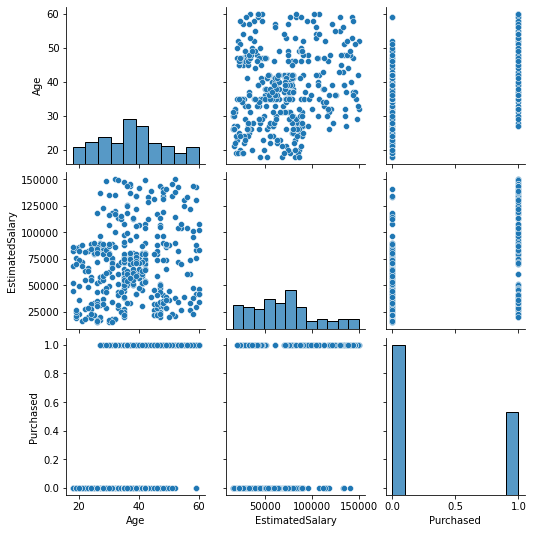

In [17]:
## Just a general birdeye view on the dataset
sns.pairplot(df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

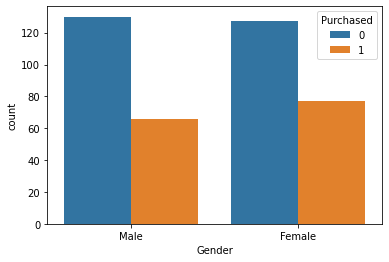

In [22]:
## Plotting a Countplot of How many people purchased or not, with respect to their Genders 

sns.countplot(x='Gender', hue='Purchased', data=df)

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

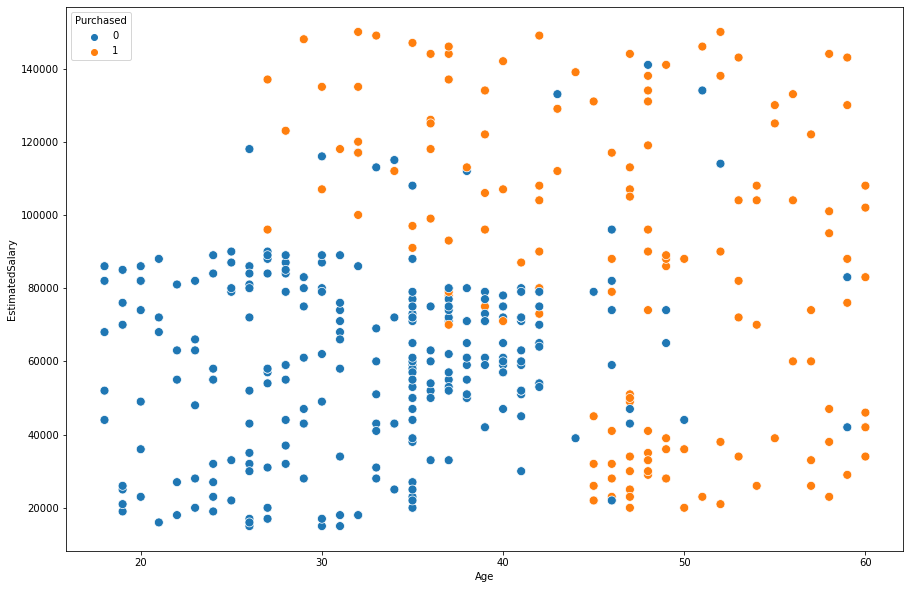

In [26]:
## A plot Estimated Salary vs Age with respect to if they purchased the product or not
plt.figure(figsize=(15,10))
sns.scatterplot(x='Age', y='EstimatedSalary', data=df, hue='Purchased', s=80)

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

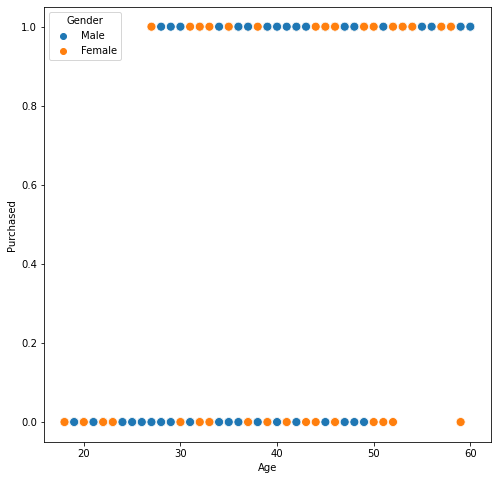

In [28]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Age', y='Purchased', data=df, hue='Gender', s=80)

In [59]:
sex = pd.get_dummies(df['Gender'], drop_first=True)

In [60]:
sex = sex.rename(columns={'Male':'Sex'})

In [62]:
sex.isnull().sum()

Sex    0
dtype: int64

In [64]:
## pandad concat function had issues and was adding random NaN values to the data
df['Sex'] = sex

In [67]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
Sex                0
dtype: int64

In [68]:
## Dropping Gender Because we have Sex as a column with 0s and 1s
df = df.drop('Gender', axis=1)

In [78]:
df

,Age,EstimatedSalary,Purchased,Sex
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


# Let's Train and Test the data I guess

### But First 

### Standardize the data first

In [73]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

In [74]:
scaler = StandardScaler()

In [76]:
scaler.fit(X)

StandardScaler()

In [84]:
scaled_features = scaler.transform(X)
scaled_features

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [85]:
df_feat = pd.DataFrame(scaled_features,columns= X.columns)
df_feat

,Age,EstimatedSalary,Sex
0,-1.781797,-1.490046,1.020204
1,-0.253587,-1.460681,1.020204
2,-1.113206,-0.785290,-0.980196
3,-1.017692,-0.374182,-0.980196
4,-1.781797,0.183751,1.020204
...,...,...,...
395,0.797057,-0.844019,-0.980196
396,1.274623,-1.372587,1.020204
397,1.179110,-1.460681,-0.980196
398,-0.158074,-1.078938,1.020204


# Train Test Split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
scaled_features, y, test_size=0.33, random_state=42)

In [87]:
X_train

array([[ 1.94321462,  0.74168287, -0.98019606],
       [-1.20871865, -1.40195167,  1.02020406],
       [ 0.31949142, -0.31545197,  1.02020406],
       [-0.92217926,  0.56549373,  1.02020406],
       [ 0.41500455,  0.30121002, -0.98019606],
       [ 0.41500455,  1.123426  , -0.98019606],
       [ 0.79705706,  0.77104772, -0.98019606],
       [ 0.89257019,  1.27025028, -0.98019606],
       [-0.44461362, -1.22576253, -0.98019606],
       [-1.78179743, -1.3138571 ,  1.02020406],
       [ 1.08359645,  0.56549373,  1.02020406],
       [-0.63563988, -1.60750566, -0.98019606],
       [-0.73115301,  0.27184516, -0.98019606],
       [ 0.98808332,  2.09246627,  1.02020406],
       [-0.54012675,  1.38770971, -0.98019606],
       [-0.0625611 ,  0.03692631, -0.98019606],
       [-1.87731056,  0.47739916, -0.98019606],
       [ 0.41500455,  0.27184516, -0.98019606],
       [-1.01769239,  0.41866944, -0.98019606],
       [ 0.22397829, -0.13926283,  1.02020406],
       [ 1.84770149,  0.12502088,  1.020

In [88]:
y_train

258    1
177    0
119    0
194    0
229    1
      ..
71     0
106    0
270    0
348    0
102    0
Name: Purchased, Length: 268, dtype: int64

# Using KNN

In [90]:
knn = KNeighborsClassifier(n_neighbors=1)



In [91]:
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [92]:
pred = knn.predict(X_test)

In [93]:
pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

# Prediction and Evaluation

In [95]:
print(confusion_matrix(y_test,pred))

[[75  5]
 [11 41]]


In [96]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        80
           1       0.89      0.79      0.84        52

    accuracy                           0.88       132
   macro avg       0.88      0.86      0.87       132
weighted avg       0.88      0.88      0.88       132



# Hyper Parameter tuning

In [106]:
from sklearn.model_selection import GridSearchCV
k_list = [*range(1,41)]


In [107]:
parameters = {'n_neighbors': k_list}

In [108]:
parameters['n_neighbors']

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

In [109]:
classifier = KNeighborsClassifier()

In [110]:
class_reg = GridSearchCV(classifier, param_grid=parameters,scoring='accuracy', cv=5)

In [111]:
class_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [112]:
print(class_reg.best_params_)


{'n_neighbors': 7}


In [113]:
print(class_reg.best_score_)

0.8990216631726066


In [114]:
y_pred = class_reg.predict(X_test)

In [116]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_pred,y_test)

In [117]:
score

0.9318181818181818

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        80
           1       0.91      0.92      0.91        52

    accuracy                           0.93       132
   macro avg       0.93      0.93      0.93       132
weighted avg       0.93      0.93      0.93       132



In [120]:
print(confusion_matrix(y_test,y_pred))

[[75  5]
 [ 4 48]]


### We got ~93% accuracy! But, to understand what we're doing here let's see some graphs. 
#### It's a graph that show us the error rate of every K value we take(we will quickly see the error rates of 
#### K values from 1 to 10)

In [127]:
error_rate = [] #empty list for our error rates

for i in range(1,10):  #A loop that iterates through K value from 1 to 10
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [128]:
error_rate

[0.12121212121212122,
 0.12121212121212122,
 0.12121212121212122,
 0.12121212121212122,
 0.12121212121212122,
 0.12121212121212122,
 0.12121212121212122,
 0.12121212121212122,
 0.12121212121212122]

Text(0, 0.5, 'Error Rate')

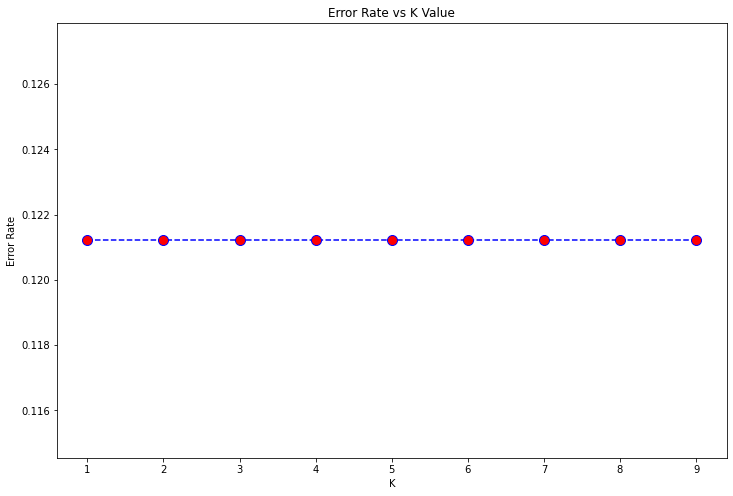

In [129]:
## A graph of Error Rate vs K Value

plt.figure(figsize=(12,8))
plt.plot(range(1,10), error_rate, color = 'blue', linestyle='dashed', marker='o', markerfacecolor= 'red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')